In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import missingno as msno

In [5]:
loan_dataframe = pd.read_csv('Loan_Default.csv')

In [6]:
loan_dataframe.shape

(148670, 34)

In [7]:
pd.set_option('display.max_columns', None)
loan_dataframe.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [8]:
loan_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [9]:
loan_dataframe.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [10]:
loan_dataframe['Status'] = pd.Categorical(loan_dataframe['Status'])
loan_dataframe.describe(exclude=[np.number])

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,lump_sum_payment,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
count,145326,148670,147762,148670,148536,148670,148670,148670,148549,148670,148670,148670,148670,148670,148670,148670,148670,148470,148470,148670,148670,148670
unique,2,4,2,3,4,2,2,2,2,2,2,2,3,2,4,4,2,7,2,4,2,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,not_lpsm,sb,pr,home,1U,CIB,CIB,45-54,to_inst,North,direct,0
freq,135348,42346,124621,113173,55934,142344,148114,127908,133420,141560,145286,148637,138201,148637,146480,48152,74392,34720,95814,74722,148637,112031


In [11]:
loan_dataframe.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [12]:
missing_percentage = pd.DataFrame(loan_dataframe.isna().sum()/len(loan_dataframe)*100).reset_index()
missing_percentage.columns = ['Feature', '%'+' of missing data']
missing_percentage.sort_values(by=['%'+' of missing data'], ascending=False)[:15]

,Feature,% of missing data
13,Upfront_charges,26.664425
12,Interest_rate_spread,24.644515
11,rate_of_interest,24.509989
33,dtir1,16.224524
29,LTV,10.155378
18,property_value,10.155378
23,income,6.154571
2,loan_limit,2.249277
4,approv_in_adv,0.610749
28,submission_of_application,0.134526


In [13]:
for column in loan_dataframe.select_dtypes(include=['object']).columns:
    print(loan_dataframe[column].value_counts())
    print()

loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64

Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64

approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64

loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64

loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64

Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64

open_credit
nopc    148114
opc        556
Name: count, dtype: int64

business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64

Neg_ammortization
not_neg    133420
neg_amm     15129
Name: count, dtype: int64

interest_only
not_int     141560
int_only      7110
Name: count, dtype: int64

lump_sum_payment
not_lpsm    145286
lpsm          3384
Name: count, dtype: int64

construction_type
sb    148637
mh        33
Name: count, dtype: int64

occupancy_t

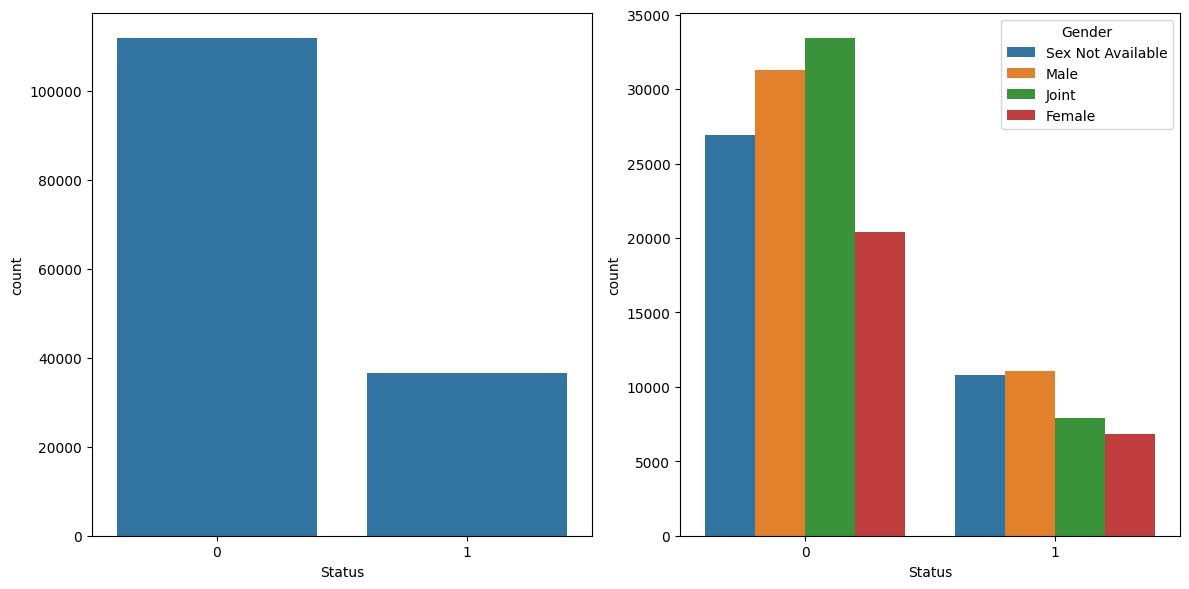

In [68]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=loan_dataframe, x='Status', ax=ax[0])
sns.countplot(data=loan_dataframe, x='Status', hue='Gender', ax=ax[1])
plt.tight_layout()

In [40]:

missing_charges=loan_dataframe.pivot_table(index='Gender', values='Upfront_charges', aggfunc=lambda x: x.isna().sum())
missing_charges.columns = ["upfront_charges_missing_values_count"]


missing_charges["percentage_of_all_values"] = missing_charges["upfront_charges_missing_values_count"]/loan_dataframe['Gender'].value_counts()*100
missing_charges

,upfront_charges_missing_values_count,percentage_of_all_values
Gender,,
Female,7377,27.055674
Joint,8727,21.080219
Male,11950,28.219903
Sex Not Available,11588,30.770865


<Axes: >

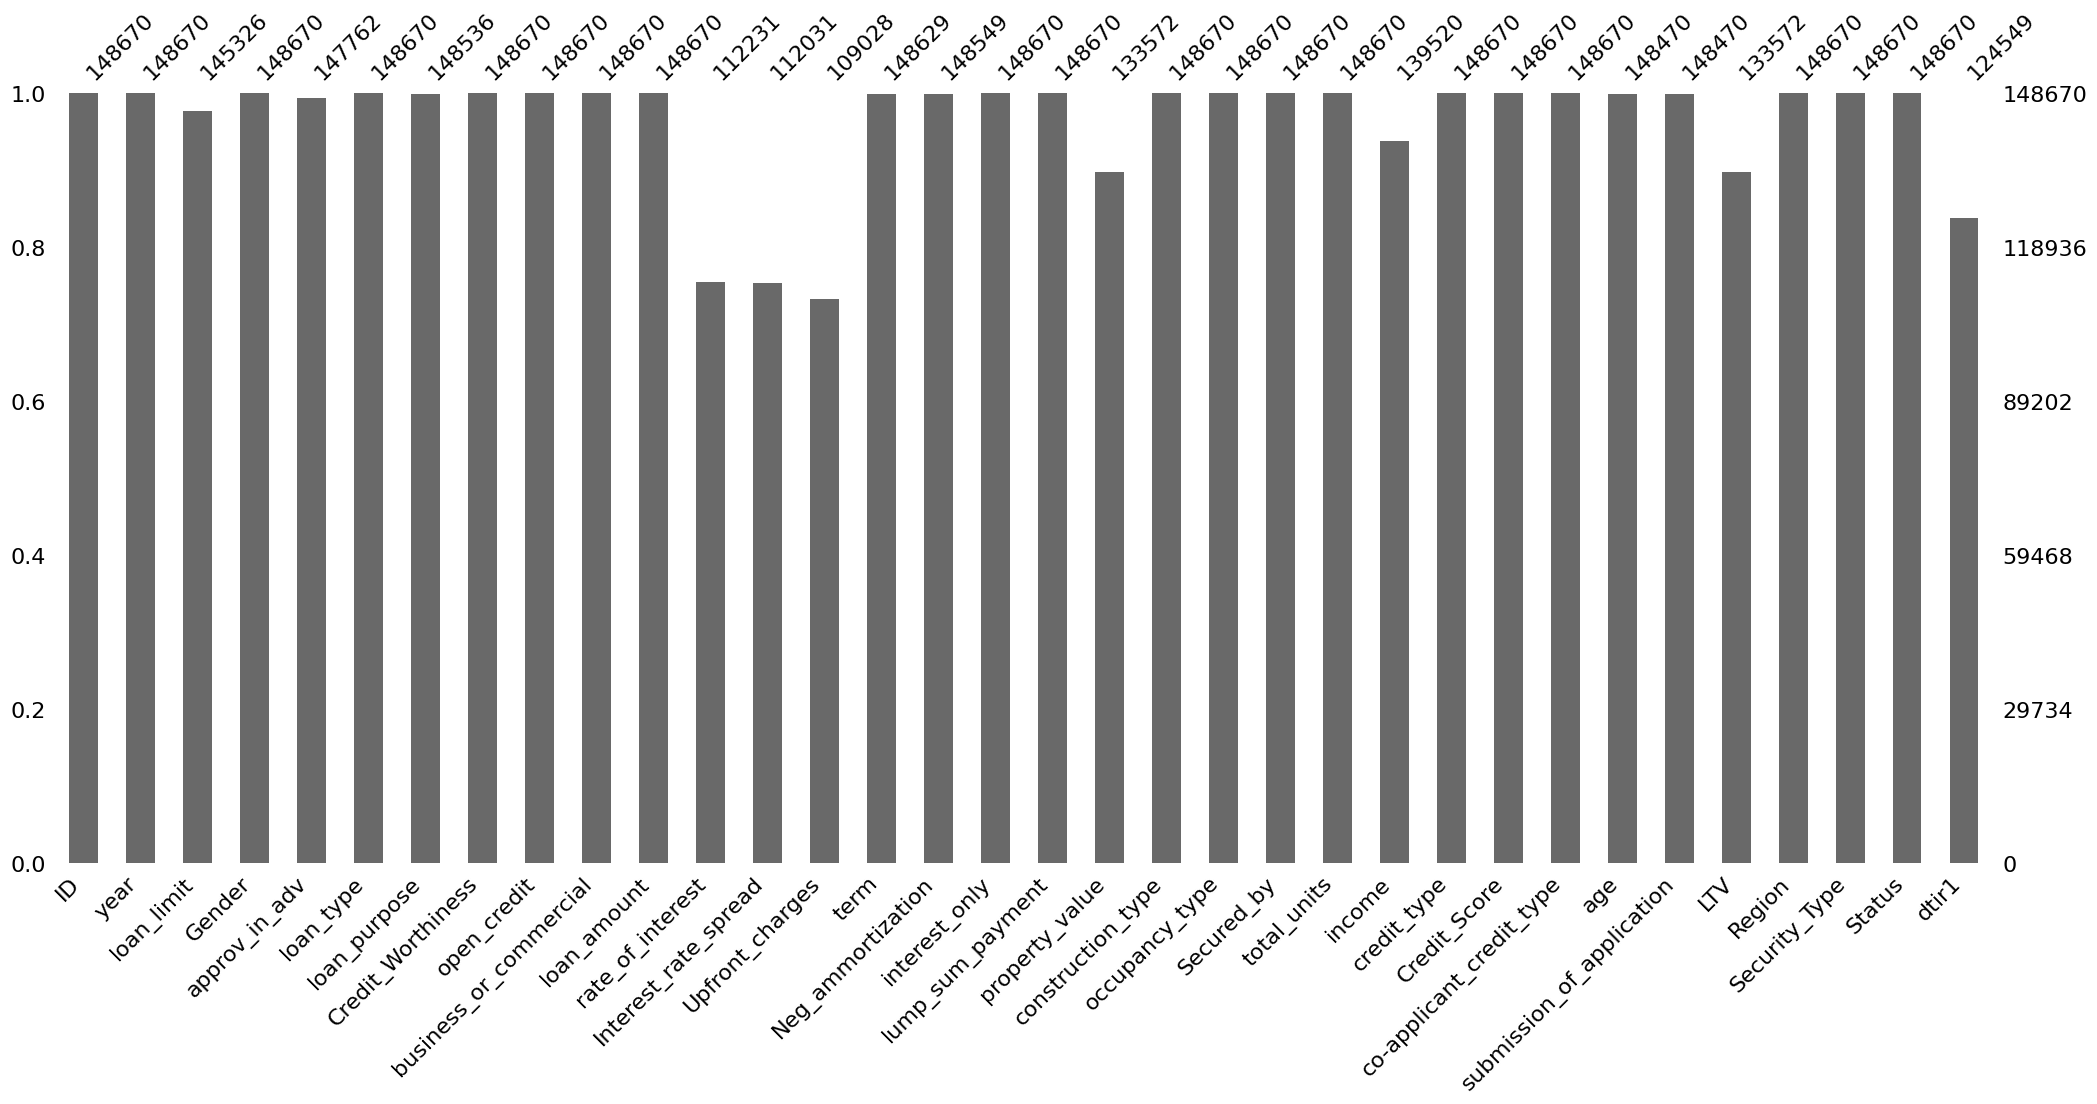

In [47]:
msno.bar(loan_dataframe)

<Axes: >

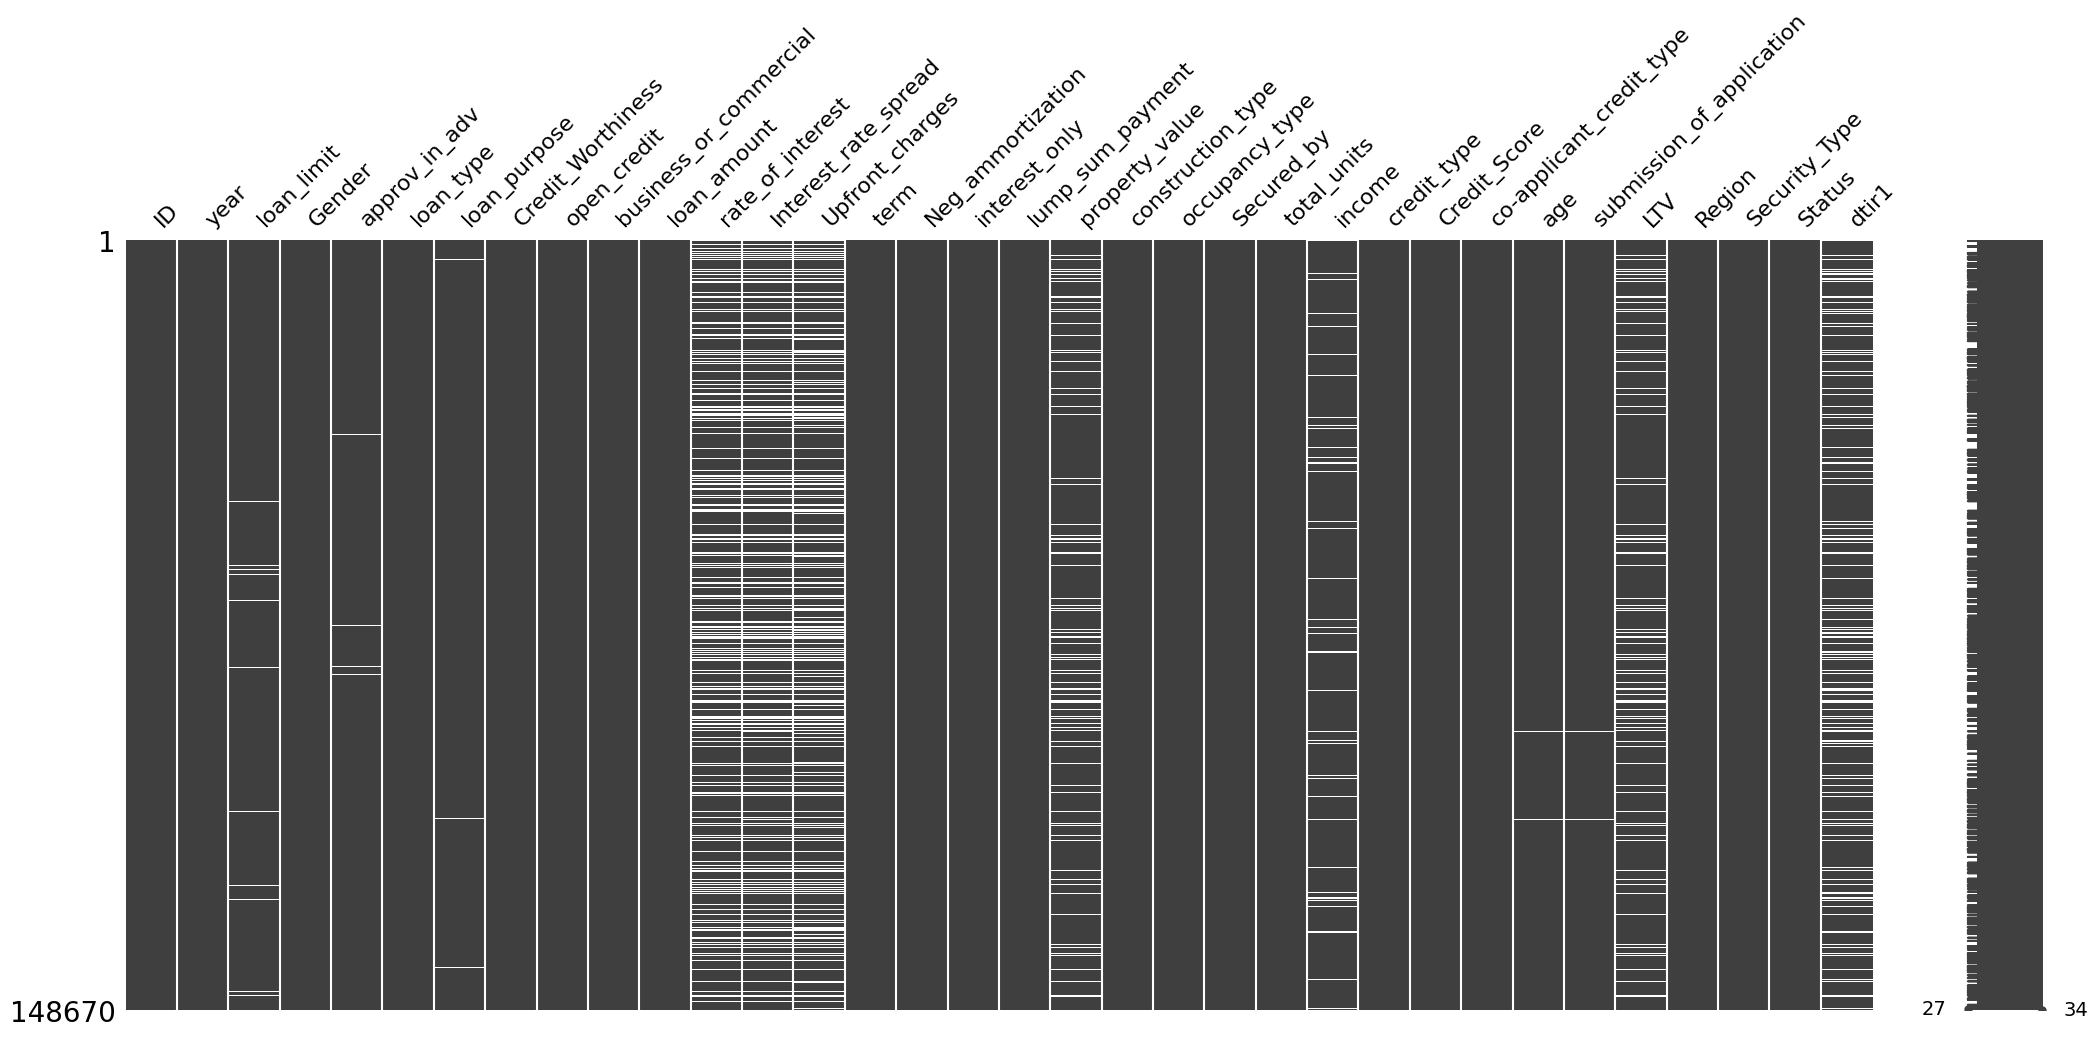

In [48]:
msno.matrix(loan_dataframe)

<Axes: >

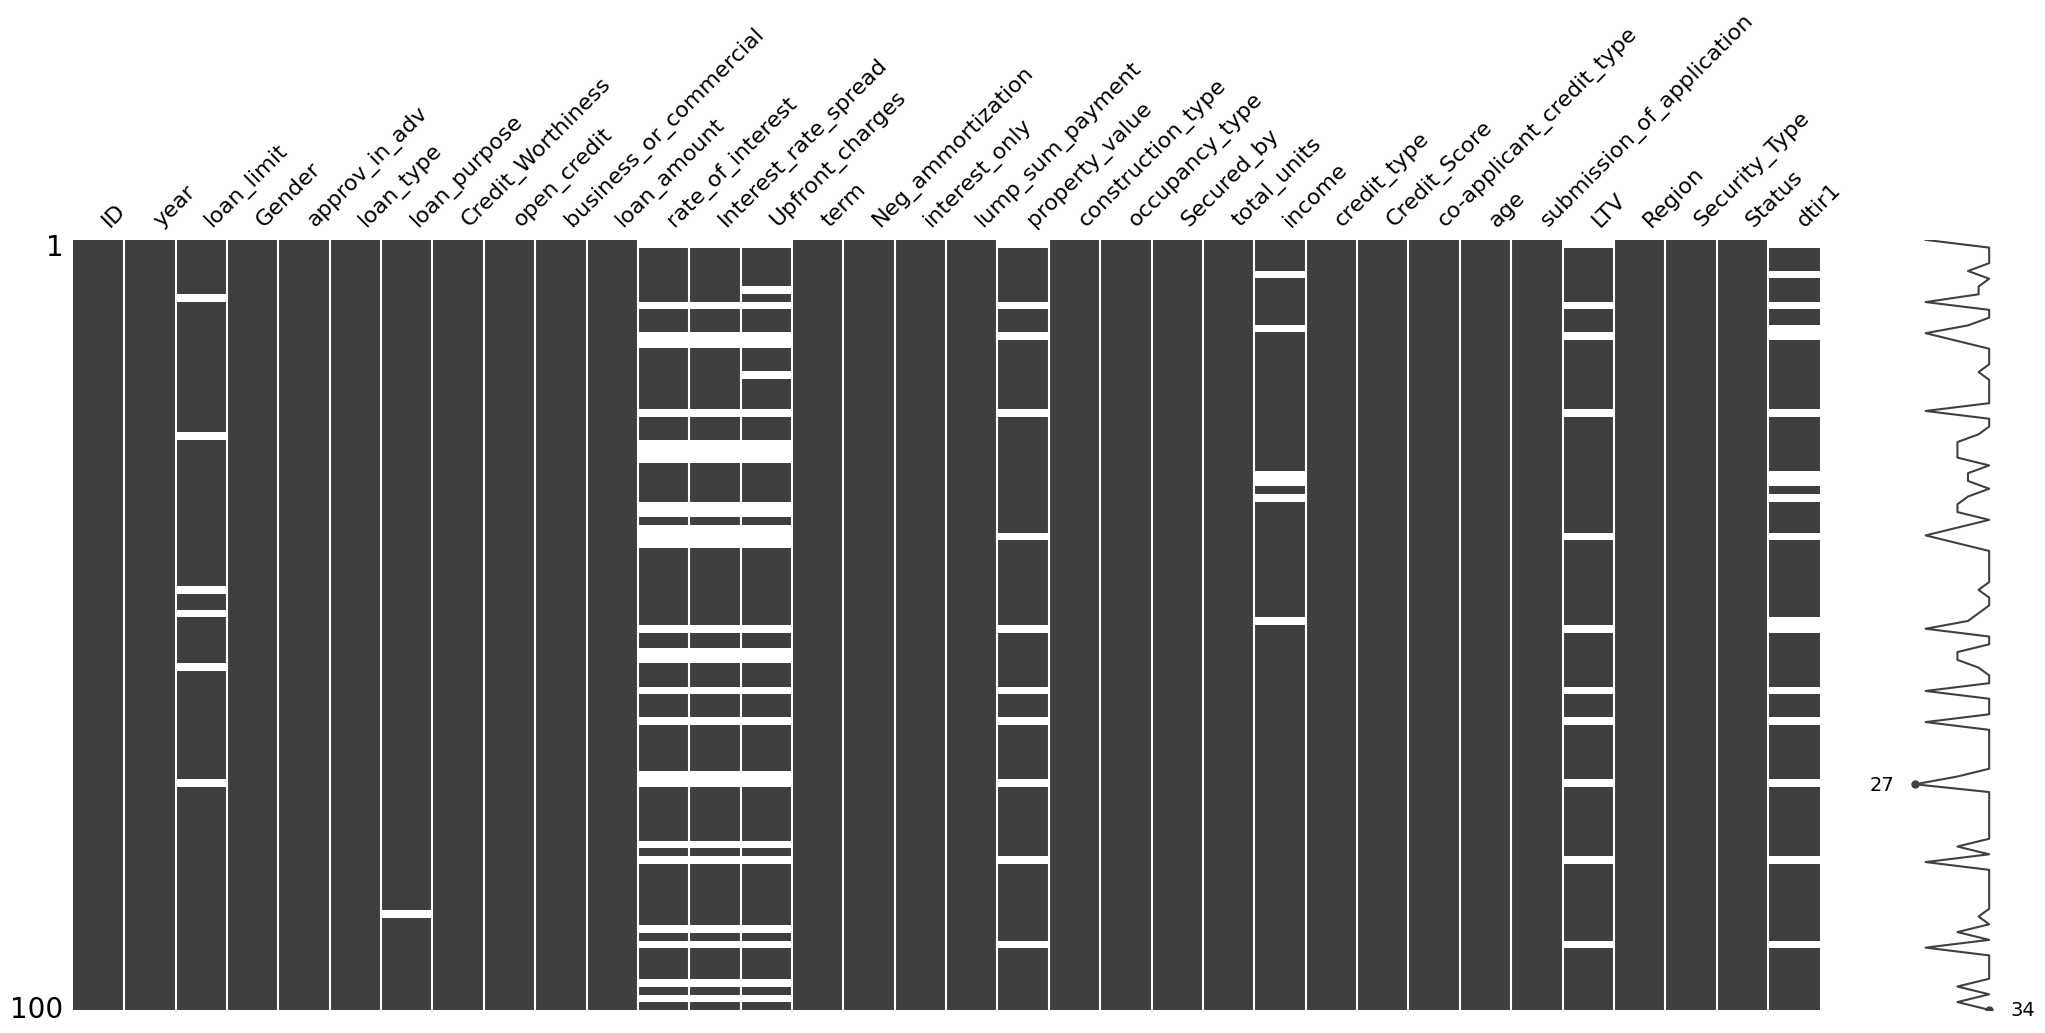

In [50]:
msno.matrix(loan_dataframe.sample(100))

<Axes: >

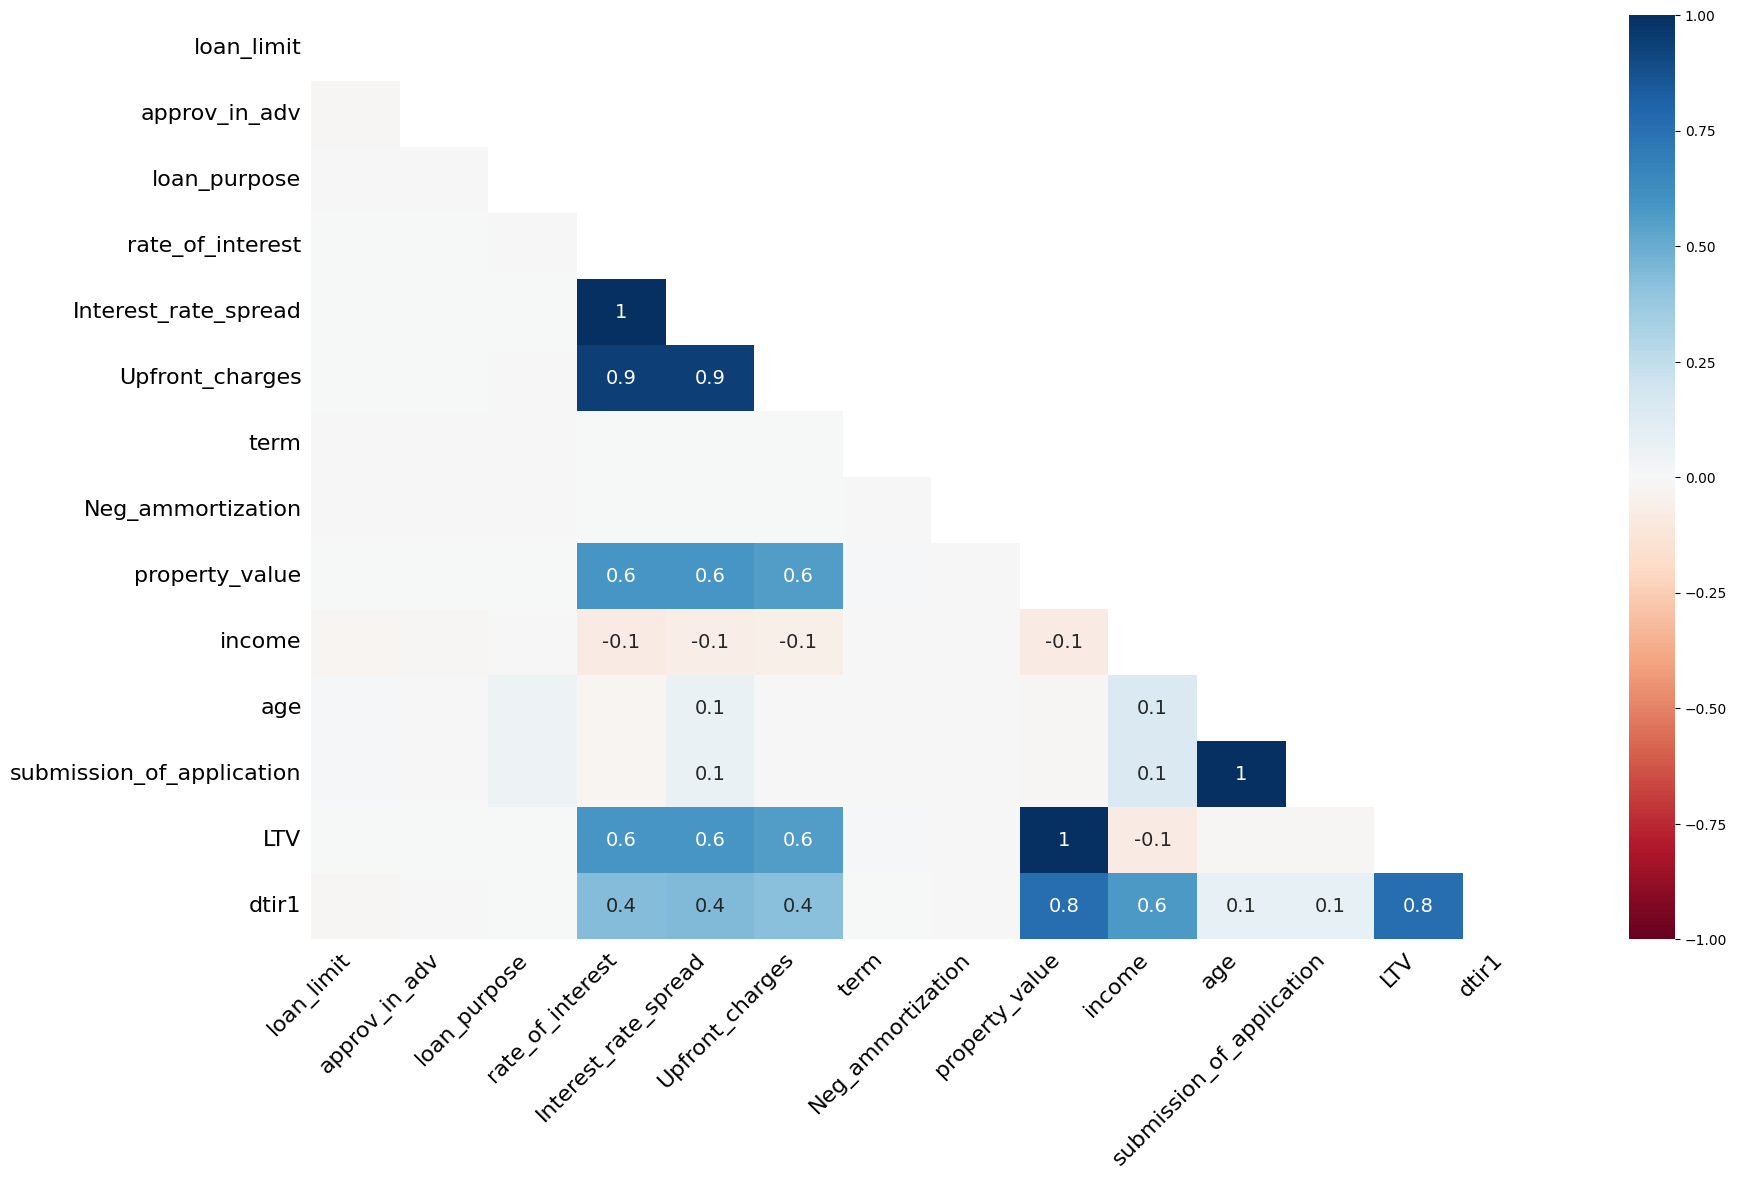

In [51]:
msno.heatmap(loan_dataframe)

<Axes: >

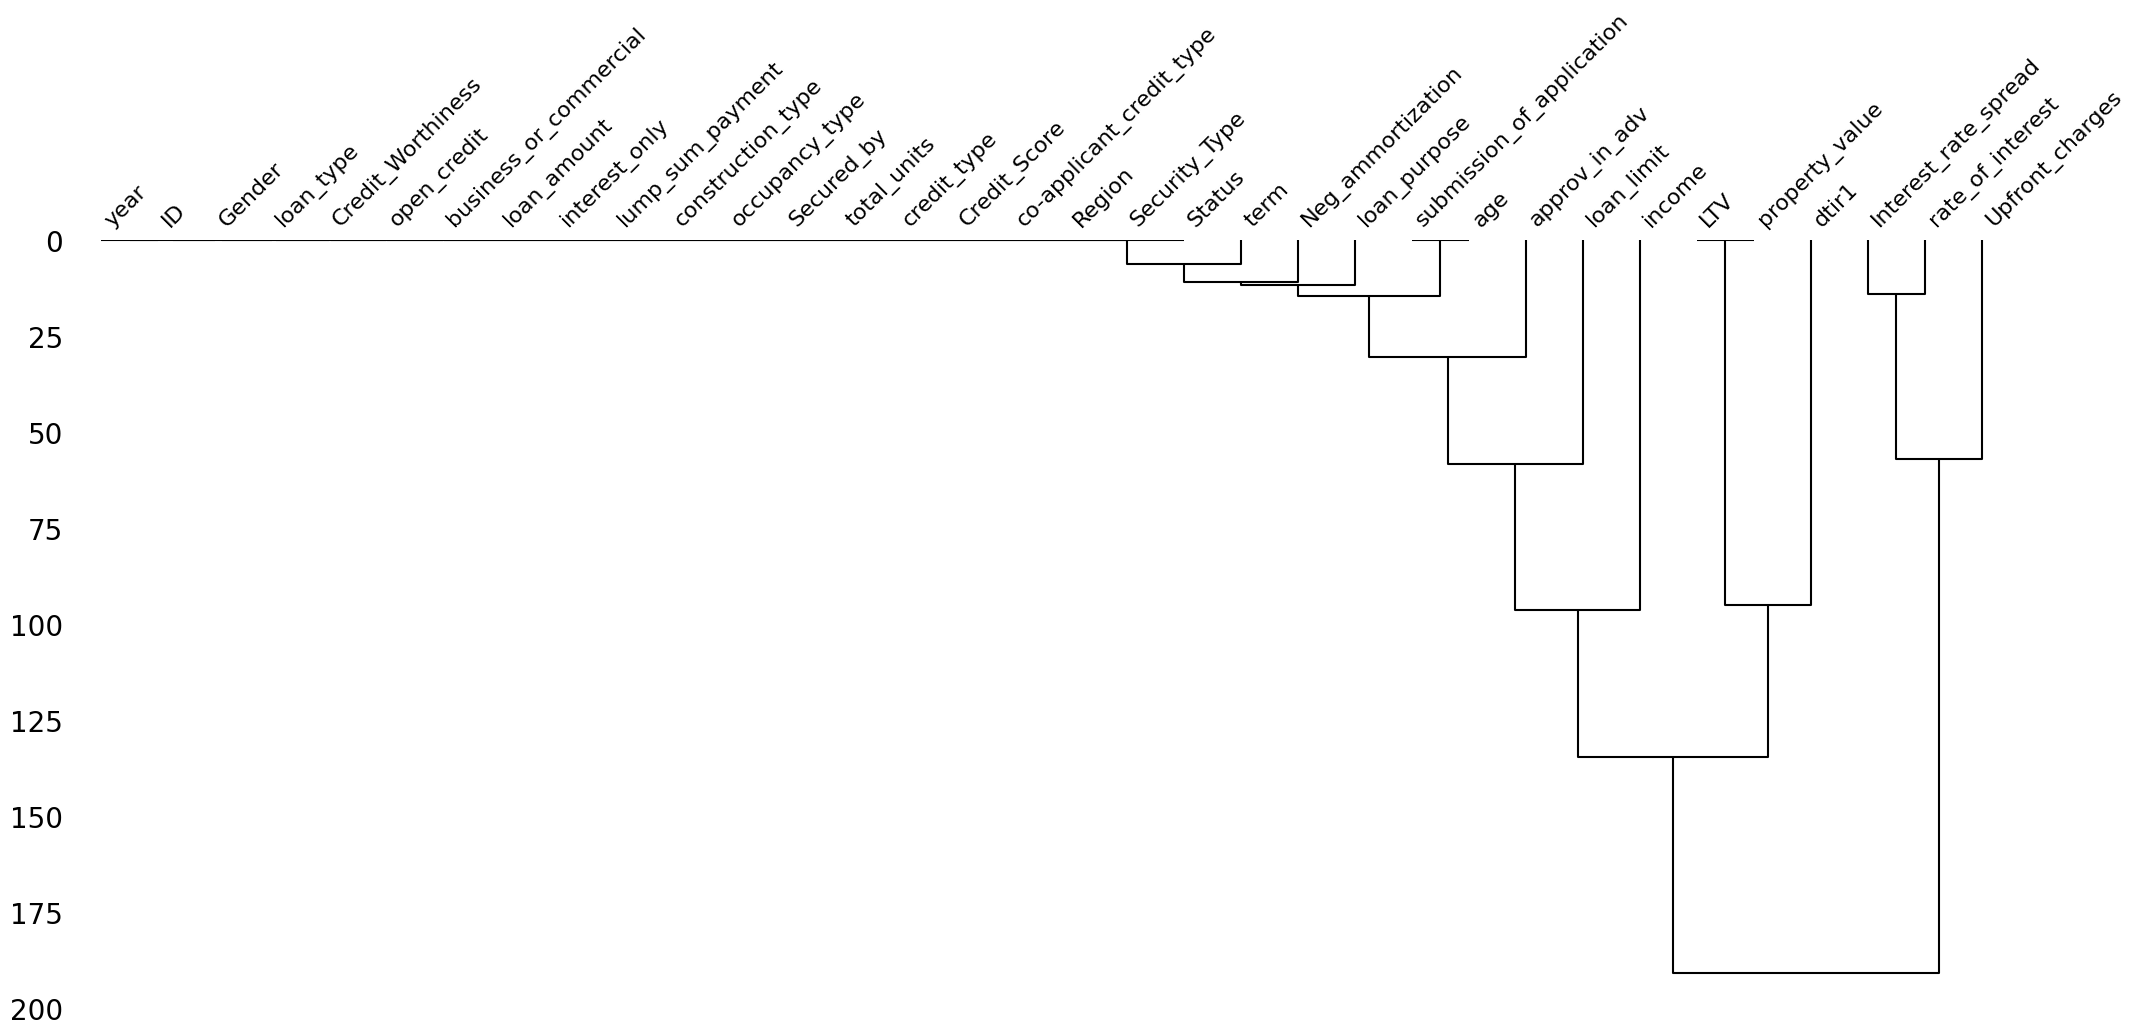

In [52]:
msno.dendrogram(loan_dataframe)